# Лабораторная работа 2. Визуализация градиентного спуска. Ландшафты потерь. Оптимайзеры.




In [45]:
%matplotlib inline

## Задание 1. Сделайте трехмерную визуализацию сходимости градиентного спуска. Нарисуйте поверхность функции двух переменных для которой осуществлялся поиск минимума методом градиентного спуска. Отдельными точками другого цвета изобразите позиции которые рассматривались на каждом шаге градиентного спуска.

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [47]:
# задаем функцию 2 переменных
def function(x, y):
    return -(torch.cos(x)**2 + torch.cos(y)**2)**2

In [48]:
# вычисляем 
x_ = torch.linspace(-2, 2, 100)
y_ = torch.linspace(-2, 2, 100)

X, Y = torch.meshgrid(x_, y_, indexing="ij")

Z = function(X, Y)

In [49]:
# начальная точка для градиентного спуска
x = torch.tensor(-1.2, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)

In [50]:
# здесь будут храниться значения
x_history=[]
y_history=[]
fn_history=[]

In [51]:
# learning rate
lr = 0.001  

# шаг
def make_gradient_step(function, x, y):
    function_result = function(x, y)          # выч ф-ю
    function_result.backward()                # выч градиент
    x.data -= lr * x.grad         
    y.data -= lr * y.grad        
    x.grad.zero_()
    y.grad.zero_()

for i in range(500):
    x_history.append(x.data.detach().numpy().copy())
    y_history.append(y.data.detach().numpy().copy())
    fn_history.append(function(x, y).data.detach().numpy().copy())
    make_gradient_step(function, x, y)

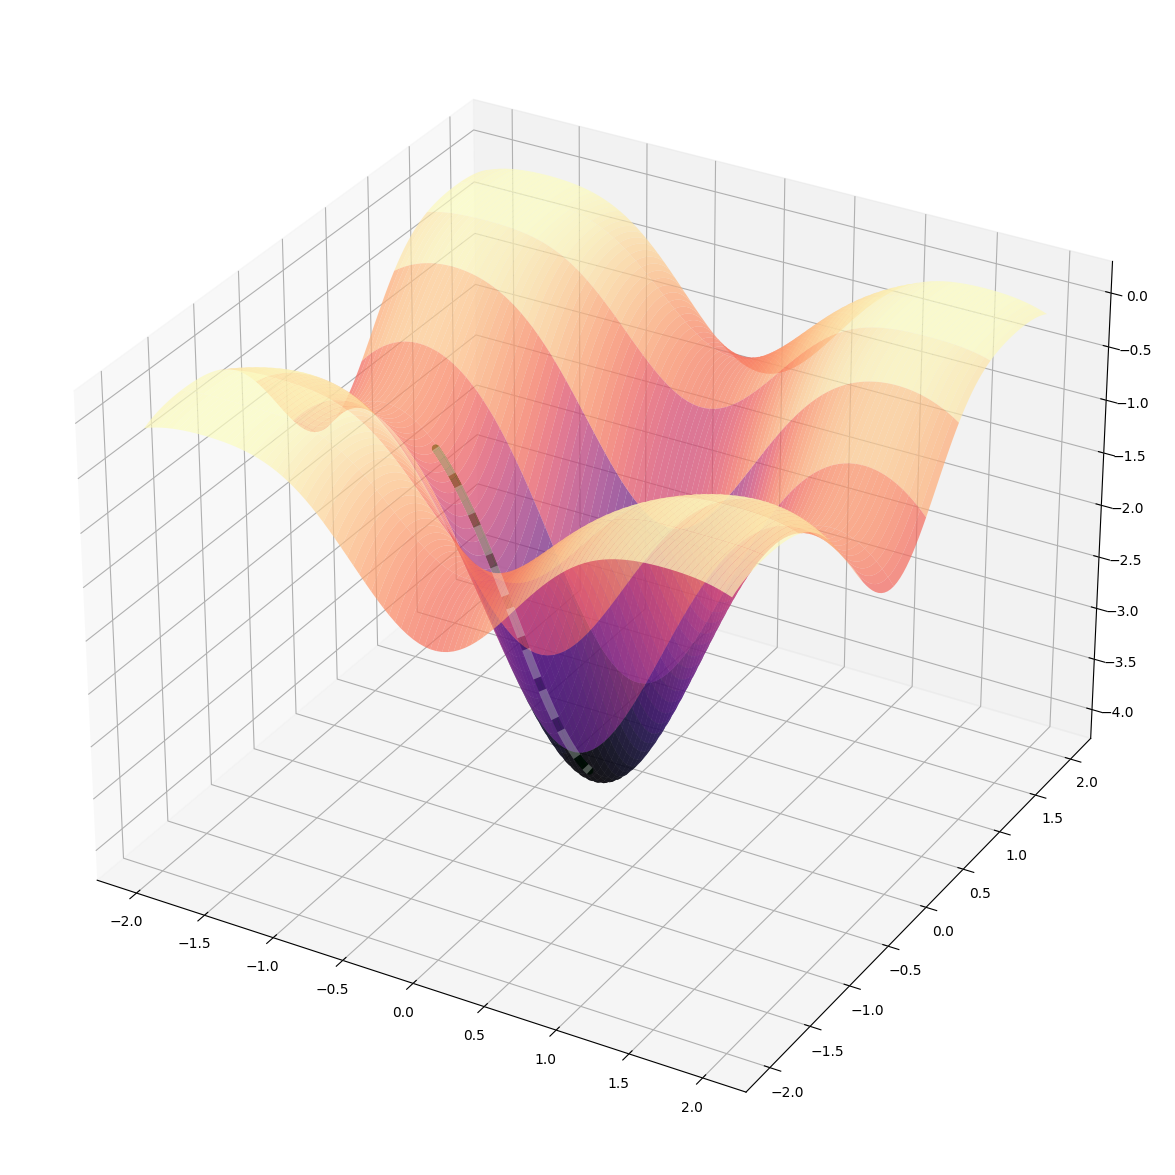

In [52]:
fig =plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_history, y_history, fn_history, color='green', s=20) # рисуем точечки
ax.plot(x_history, y_history, fn_history, color='white', linewidth=6, linestyle ='dashed', zorder=10, alpha=0.3) # рисуем траекторию точечек
ax.plot_surface(X, Y, Z, rstride=1, cmap = 'magma', linewidth=0, zorder=1, alpha=0.7) # рисуем 3d функцию
plt.show()

## Задание 2. Для своего кода лабораторной работы №1 примените три разных оптимайзера. Постройте графики зависимости величины функции потерь от номера эпохи для всех трех оптимайзеров на одном графике сначала для обучающей выборки, потом для тестовой.

### тут еще ничего не доделано

In [2]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((28, 28)),    # из 32x32 сделаем 28x28
        torchvision.transforms.ToTensor(),          # сразу в тензор
        torchvision.transforms.Grayscale(num_output_channels=1),  # из 3 каналов сделаем 1
])
train = torchvision.datasets.SVHN(
    root='/SVHN',
    download=True,
    transform=transform,
    split='train')
test = torchvision.datasets.SVHN(
    root='/SVHN',
    download=True,
    transform=transform,
    split='test')

train_loader = DataLoader(dataset=train, batch_size = 100, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size = 100)

class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        self.fc3   = torch.nn.Linear(84, 10)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        return x
        
lenet5 = LeNet5()

100%|██████████| 182040794/182040794 [00:52<00:00, 3458857.05it/s]


100%|██████████| 64275384/64275384 [00:10<00:00, 6385434.73it/s] 


In [8]:
import torch.optim as opt

optimizatorz = {
    "SGD": opt.SGD,
    "Adagrad": opt.Adagrad,
    "Rprop": opt.Rprop
}

In [13]:
def do_stuff(oname, train_loader, test_loader, model):
    optimizer = optimizatorz[oname](model.parameters(), lr=0.001)
    
    loss = torch.nn.CrossEntropyLoss()
    optimizer = optimizer

    #test_accuracy_history = []
    test_loss_history = []
    train_loss_history = []

    i=0
    for epoch in range(5):
        print(f"epoch {epoch}\n")
        model.train()
        for imgs, labels in train_loader:
            optimizer.zero_grad()
            imgs = imgs.to(device) # Move imgs to GPU
            labels = labels.to(device) # Move labels to GPU
            
            preds = model(imgs)
            loss_value = loss(preds, labels)
            loss_value.backward()
            optimizer.step()   
        train_loss_history.append(loss_value.data.cpu())
        
        model.eval()
        with torch.no_grad():
            for imgs, labels in test_loader:            
                imgs = imgs.to(device)
                labels = labels.to(device)      
                preds = model(imgs)
                loss_value = loss(preds, labels)
            test_loss_history.append(loss_value.data.cpu())
    return train_loss_history, test_loss_history

In [14]:
train_results = {}
test_results={}

for optimizer in optimizatorz: 
    print(f'Using Optimizer {optimizer}')
    model = lenet5.to(device)
    train_loss, test_loss = do_stuff(optimizer, train_loader, test_loader, model)
    train_results[optimizer] = train_loss
    test_results[optimizer] = test_loss

Using Optimizer SGD
epoch 0

epoch 1

epoch 2

epoch 3

epoch 4

Using Optimizer Adagrad
epoch 0

epoch 1

epoch 2

epoch 3

epoch 4

Using Optimizer Rprop
epoch 0

epoch 1

epoch 2

epoch 3

epoch 4



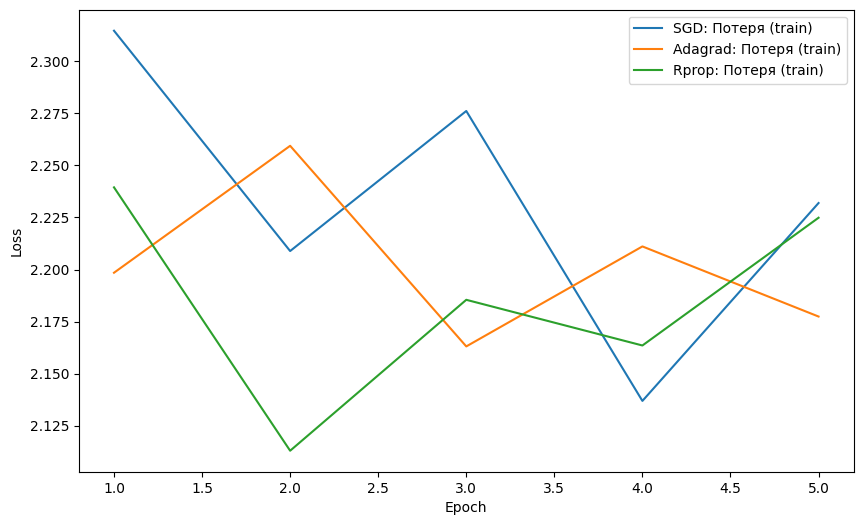

In [21]:
plt.figure(figsize=(10, 6))
for optimizer in optimizatorz:
    plt.plot(range(1, 6), train_results[optimizer], label=f'{optimizer}: Потеря (train)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#чето фигня какая-то...

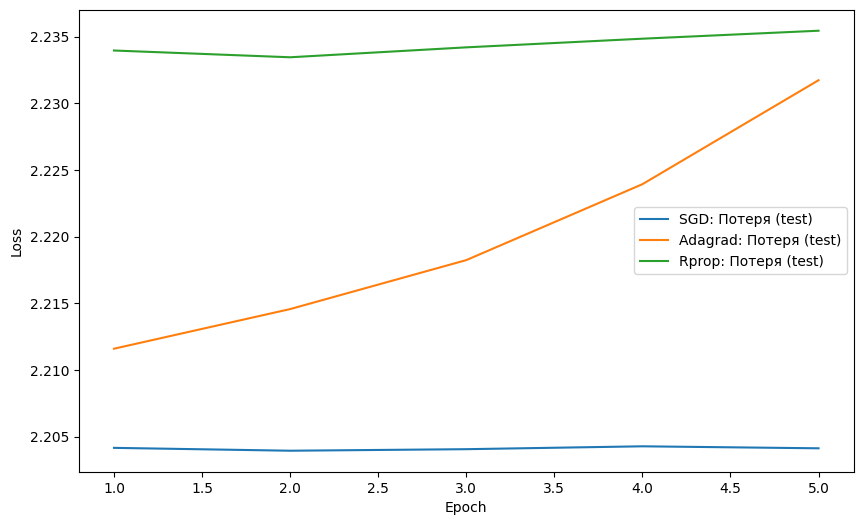

In [23]:
plt.figure(figsize=(10, 6))
for optimizer in optimizatorz:
    plt.plot(range(1, 6), test_results[optimizer], label=f'{optimizer}: Потеря (test)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
#одно другого хуже

## Задание 3. Изучите статью https://habr.com/ru/companies/skillfactory/articles/536606/. Попробуйте воспроизвести ее результаты в своем коде. Если не получится сделать анимацию, можно те же графики оставить статическими.

In [ ]:
# ваш код здесь

## Задание 4. В коде, полученном после выполнения задания 3, релизуйте по формулам один из оптимайзеров. Как изменится визуализация поиска минимума из тех же трех точек?

In [ ]:
# ваш код здесь